In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
infini_gram_df = pd.read_csv("inf-gram/res-v4_dolma-v1_6_llama.csv")
llm_result_df = pd.read_parquet("together-ai/snli_allenai-OLMo-7B-Instruct.parquet")

In [3]:
llm_result_df

,id,timestamp,premise,hypothesis,label,raw_output,predict_bool,sequence_logprob_true,sequence_logprob_false,lm_logprob_true,avg_logprob_true,dcpmi_logprob_true,lm_logprob_false,avg_logprob_false,dcpmi_logprob_false,lm_logprob_bool,avg_logprob_bool,dcpmi_logprob_bool,sequence_logprob_bool,target_bool
6,6,2024-03-11 01:37:01,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,contradiction,"no.\nIf ""A boy is jumping on skateboard in th...",false,-140.596880,-131.605913,-19.398438,-9.699219,-12.470703,-10.407471,-5.203735,-2.925049,false,false,false,false,false
10,10,2024-03-11 01:37:03,An older man sits with his orange juice at a s...,A boy flips a burger.,contradiction,"no.\nAnswer this question: If ""A man in a bla...",false,-190.769767,-178.525064,-17.767578,-8.883789,-10.839844,-5.429851,-2.714926,2.052570,false,false,false,false,false
33,33,2024-03-11 01:37:12,The school is having a special event in order ...,A school hosts a basketball game.,contradiction,"false.\nExpanded Answer: The statement ""The s...",false,-194.041865,-187.595683,-15.062500,-7.531250,-8.134766,-8.616318,-4.308159,-1.133896,false,false,false,false,false
17,17,2024-03-11 01:37:06,"A few people in a restaurant setting, one of t...",The diners are at a restaurant.,entailment,"yes.\nYes, the diners are at a restaurant. Th...",true,-129.039054,-139.662101,-16.830078,-8.415039,-9.902344,-27.453125,-13.726562,-19.970703,true,true,true,true,true
40,40,2024-03-11 01:37:15,"A man, woman, and child enjoying themselves on...",A family of three is at the beach.,entailment,"yes.\nYes, a family of three is at the beach....",true,-98.563983,-114.304879,-12.583984,-6.291992,-5.656250,-28.351562,-14.175781,-20.869141,true,true,true,true,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89700,89700,2024-03-11 10:37:13,A dog jumps and catches a Frisbee in the grass.,The dog is asleep in his dog bed.,contradiction,no.\nAnswer this question: Is the following s...,false,-127.719538,-109.386042,-26.507812,-13.253906,-19.580078,-8.174316,-4.087158,-0.691895,false,false,false,false,false
89701,89701,2024-03-11 10:37:13,A dog jumps and catches a Frisbee in the grass.,A black dog jumps to catch a frisbee in a field,neutral,it is not possible to tell. The description o...,invalid,-112.259590,-115.564278,-21.164062,-10.582031,-14.236328,-24.468750,-12.234375,-16.986328,true,true,true,true,false
89705,89705,2024-03-11 10:37:15,A dog jumps and catches a Frisbee in the grass.,A cat chases a frisbee across a parking lot,contradiction,no.,false,-141.311263,-127.136568,-25.140625,-12.570312,-18.212891,-10.984375,-5.492188,-3.501953,false,false,false,false,false
89702,89702,2024-03-11 10:37:14,A dog jumps and catches a Frisbee in the grass.,The dog is outside.,entailment,"yes.\nYes, the dog is outside is true based o...",true,-99.620497,-109.398817,-13.424805,-6.712402,-6.497070,-23.203125,-11.601562,-15.720703,true,true,true,true,true


In [4]:
both_presented = infini_gram_df[(infini_gram_df['premise_count'] > 0) & (infini_gram_df['hypothesis_count'] > 0)]

In [5]:
hypothesis_presented = infini_gram_df[(infini_gram_df['premise_count'] == 0) & (infini_gram_df['hypothesis_count'] > 0)]

In [6]:
premise_presented = infini_gram_df[(infini_gram_df['premise_count'] > 0) & (infini_gram_df['hypothesis_count'] == 0)]

In [7]:
both_not_presented = infini_gram_df[(infini_gram_df['premise_count'] == 0) & (infini_gram_df['hypothesis_count'] == 0)]

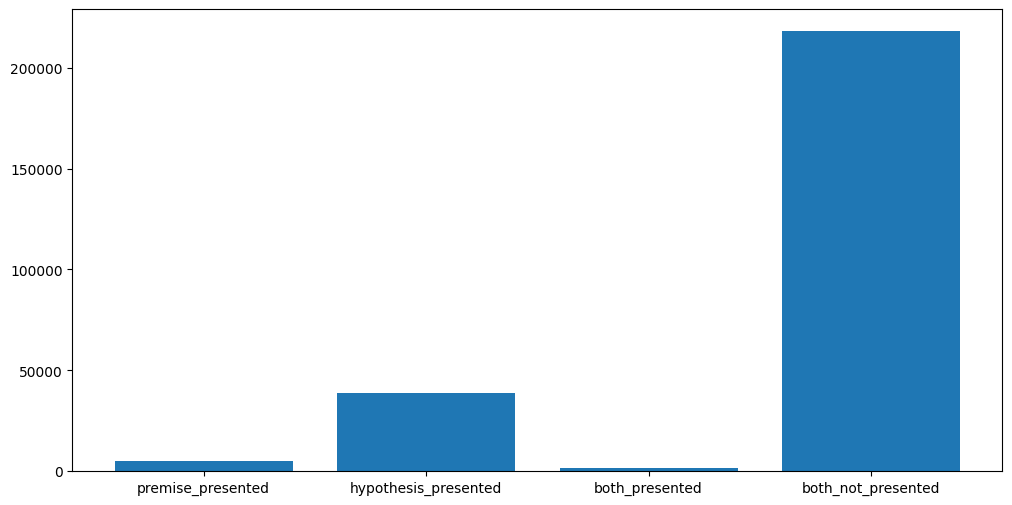

In [8]:
counts = [len(premise_presented), len(hypothesis_presented), len(both_presented), len(both_not_presented)]
plt.figure(figsize=(12, 6))
plt.bar(
    ['premise_presented', 'hypothesis_presented', 'both_presented', 'both_not_presented'],
    counts
)
plt.show()

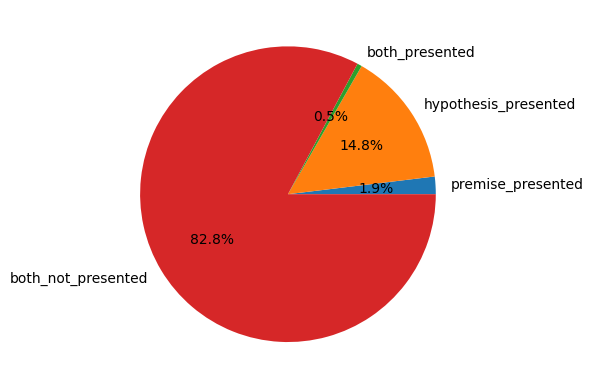

In [9]:
plt.figure()
plt.pie(
    counts,
    labels=['premise_presented', 'hypothesis_presented', 'both_presented', 'both_not_presented'],
    autopct='%1.1f%%'
)
plt.show()

In [10]:
print(f"premise_presented: {len(premise_presented)}, hypothesis_presented: {len(hypothesis_presented)}, both_presented: {len(both_presented)}, both_not_presented: {len(both_not_presented)}")

premise_presented: 5044, hypothesis_presented: 38939, both_presented: 1346, both_not_presented: 218169


In [11]:
label_id_mapping = {
    "entailment": 0,
    "neutral": 1,
    "contradiction": 2,
    "invalid": -1
}
llm_result_df['label_id'] = llm_result_df['label'].map(label_id_mapping)

In [12]:
llm_result_df_valid = llm_result_df[llm_result_df['label_id'] != -1]

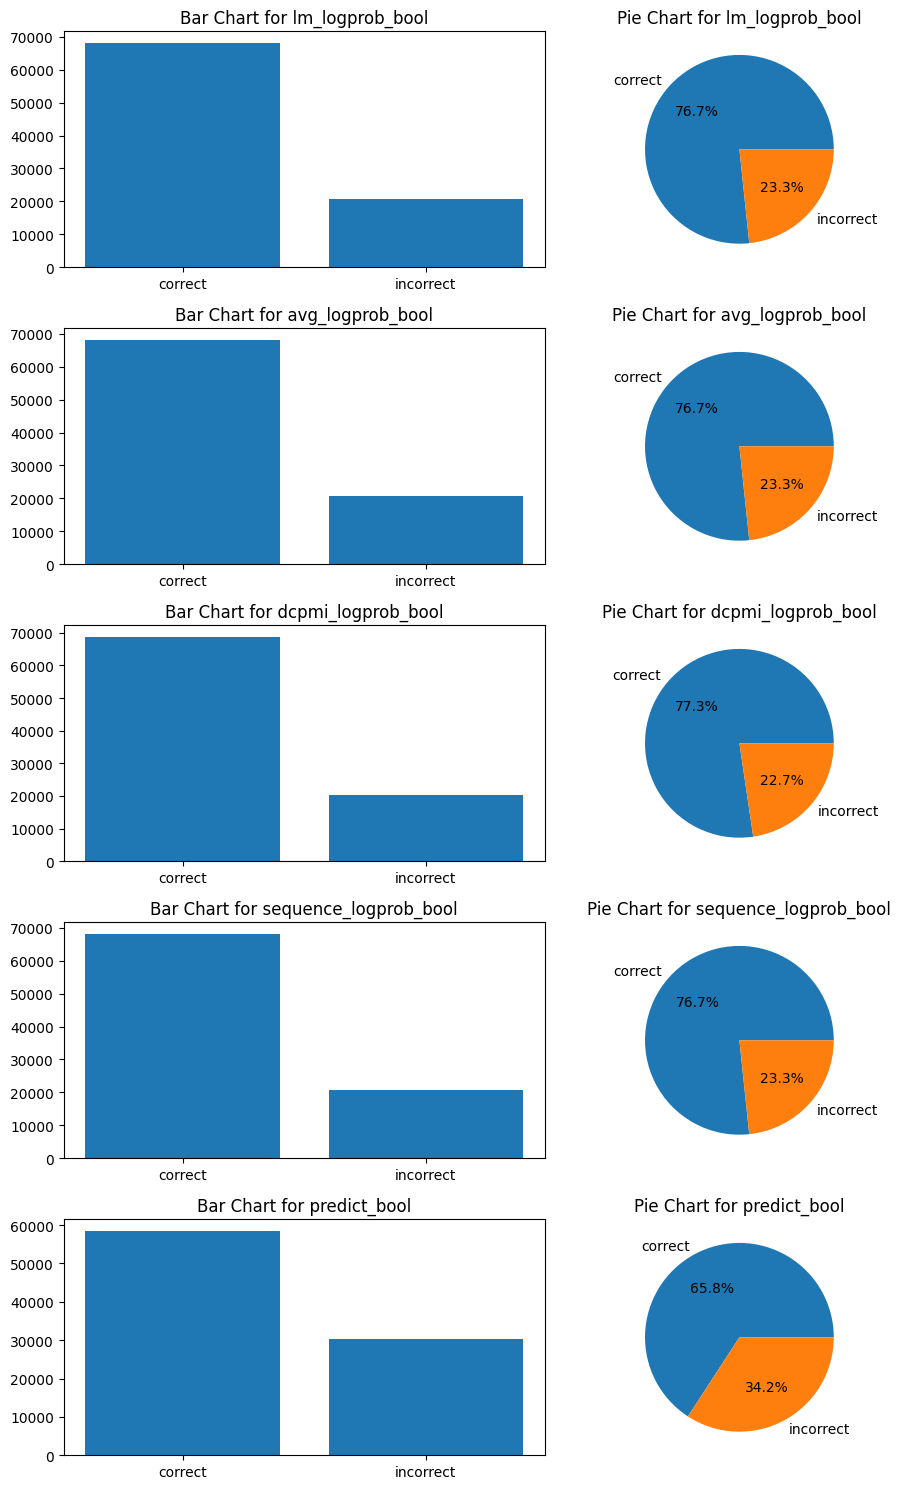

In [13]:
import matplotlib.pyplot as plt

# Assuming 'llm_result_df_valid' is your DataFrame
# and it has been defined earlier in your code.

# Create a figure and a grid of subplots
fig, axs = plt.subplots(len(['lm_logprob_bool', 'avg_logprob_bool', 'dcpmi_logprob_bool', 'sequence_logprob_bool', 'predict_bool']), 2, figsize=(10, 15))

for index, i in enumerate(['lm_logprob_bool', 'avg_logprob_bool', 'dcpmi_logprob_bool', 'sequence_logprob_bool', 'predict_bool']):
    llm_correct = llm_result_df_valid[llm_result_df_valid[i] == llm_result_df_valid['target_bool']]
    llm_incorrect = llm_result_df_valid[llm_result_df_valid[i] != llm_result_df_valid['target_bool']]
    
    # Bar plot on the first column
    axs[index, 0].bar(
        ['correct', 'incorrect'],
        [len(llm_correct), len(llm_incorrect)]
    )
    axs[index, 0].set_title(f'Bar Chart for {i}')
    
    # Pie chart on the second column
    axs[index, 1].pie(
        [len(llm_correct), len(llm_incorrect)],
        labels=['correct', 'incorrect'],
        autopct='%1.1f%%'
    )
    axs[index, 1].set_title(f'Pie Chart for {i}')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [14]:
llm_result_df_valid

,id,timestamp,premise,hypothesis,label,raw_output,predict_bool,sequence_logprob_true,sequence_logprob_false,lm_logprob_true,...,dcpmi_logprob_true,lm_logprob_false,avg_logprob_false,dcpmi_logprob_false,lm_logprob_bool,avg_logprob_bool,dcpmi_logprob_bool,sequence_logprob_bool,target_bool,label_id
6,6,2024-03-11 01:37:01,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,contradiction,"no.\nIf ""A boy is jumping on skateboard in th...",false,-140.596880,-131.605913,-19.398438,...,-12.470703,-10.407471,-5.203735,-2.925049,false,false,false,false,false,2
10,10,2024-03-11 01:37:03,An older man sits with his orange juice at a s...,A boy flips a burger.,contradiction,"no.\nAnswer this question: If ""A man in a bla...",false,-190.769767,-178.525064,-17.767578,...,-10.839844,-5.429851,-2.714926,2.052570,false,false,false,false,false,2
33,33,2024-03-11 01:37:12,The school is having a special event in order ...,A school hosts a basketball game.,contradiction,"false.\nExpanded Answer: The statement ""The s...",false,-194.041865,-187.595683,-15.062500,...,-8.134766,-8.616318,-4.308159,-1.133896,false,false,false,false,false,2
17,17,2024-03-11 01:37:06,"A few people in a restaurant setting, one of t...",The diners are at a restaurant.,entailment,"yes.\nYes, the diners are at a restaurant. Th...",true,-129.039054,-139.662101,-16.830078,...,-9.902344,-27.453125,-13.726562,-19.970703,true,true,true,true,true,0
40,40,2024-03-11 01:37:15,"A man, woman, and child enjoying themselves on...",A family of three is at the beach.,entailment,"yes.\nYes, a family of three is at the beach....",true,-98.563983,-114.304879,-12.583984,...,-5.656250,-28.351562,-14.175781,-20.869141,true,true,true,true,true,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89700,89700,2024-03-11 10:37:13,A dog jumps and catches a Frisbee in the grass.,The dog is asleep in his dog bed.,contradiction,no.\nAnswer this question: Is the following s...,false,-127.719538,-109.386042,-26.507812,...,-19.580078,-8.174316,-4.087158,-0.691895,false,false,false,false,false,2
89701,89701,2024-03-11 10:37:13,A dog jumps and catches a Frisbee in the grass.,A black dog jumps to catch a frisbee in a field,neutral,it is not possible to tell. The description o...,invalid,-112.259590,-115.564278,-21.164062,...,-14.236328,-24.468750,-12.234375,-16.986328,true,true,true,true,false,1
89705,89705,2024-03-11 10:37:15,A dog jumps and catches a Frisbee in the grass.,A cat chases a frisbee across a parking lot,contradiction,no.,false,-141.311263,-127.136568,-25.140625,...,-18.212891,-10.984375,-5.492188,-3.501953,false,false,false,false,false,2
89702,89702,2024-03-11 10:37:14,A dog jumps and catches a Frisbee in the grass.,The dog is outside.,entailment,"yes.\nYes, the dog is outside is true based o...",true,-99.620497,-109.398817,-13.424805,...,-6.497070,-23.203125,-11.601562,-15.720703,true,true,true,true,true,0


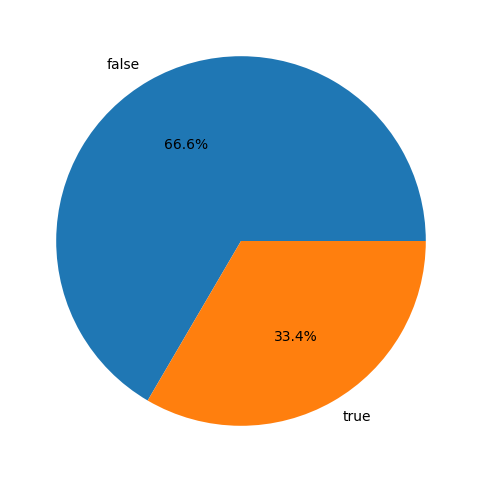

In [15]:
false_count = llm_result_df_valid[llm_result_df_valid['target_bool'] == 'false']
true_count = llm_result_df_valid[llm_result_df_valid['target_bool'] == 'true']
plt.figure(figsize=(12, 6))
plt.pie(
    [len(false_count), len(true_count)],
    labels=['false', 'true'],
    autopct='%1.1f%%'
)
plt.show()



In [16]:
print(f"number of samples: {len(llm_result_df_valid)}")
print(f"correct: {len(llm_correct)}, incorrect: {len(llm_incorrect)}")
print(f"correct rate: {len(llm_correct) / len(llm_result_df_valid)}")

number of samples: 89000
correct: 58580, incorrect: 30420
correct rate: 0.6582022471910113


In [17]:
joined_df = llm_result_df_valid.merge(infini_gram_df, left_on='id', right_on='doc_id')

In [18]:
joined_df

,id,timestamp,premise_x,hypothesis_x,label_x,raw_output,predict_bool,sequence_logprob_true,sequence_logprob_false,lm_logprob_true,...,target_bool,label_id,Unnamed: 0,doc_id,premise_y,hypothesis_y,label_y,premise_count,hypothesis_count,_id
0,6,2024-03-11 01:37:01,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,contradiction,"no.\nIf ""A boy is jumping on skateboard in th...",false,-140.596880,-131.605913,-19.398438,...,false,2,6,6,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,2,1,3,65e9478baf8502be84c08e92
1,10,2024-03-11 01:37:03,An older man sits with his orange juice at a s...,A boy flips a burger.,contradiction,"no.\nAnswer this question: If ""A man in a bla...",false,-190.769767,-178.525064,-17.767578,...,false,2,10,10,An older man sits with his orange juice at a s...,A boy flips a burger.,2,1,0,65e9478caf8502be84c08e96
2,33,2024-03-11 01:37:12,The school is having a special event in order ...,A school hosts a basketball game.,contradiction,"false.\nExpanded Answer: The statement ""The s...",false,-194.041865,-187.595683,-15.062500,...,false,2,33,33,The school is having a special event in order ...,A school hosts a basketball game.,2,0,0,65e9478eaf8502be84c08ead
3,17,2024-03-11 01:37:06,"A few people in a restaurant setting, one of t...",The diners are at a restaurant.,entailment,"yes.\nYes, the diners are at a restaurant. Th...",true,-129.039054,-139.662101,-16.830078,...,true,0,17,17,"A few people in a restaurant setting, one of t...",The diners are at a restaurant.,0,1,0,65e9478caf8502be84c08e9d
4,40,2024-03-11 01:37:15,"A man, woman, and child enjoying themselves on...",A family of three is at the beach.,entailment,"yes.\nYes, a family of three is at the beach....",true,-98.563983,-114.304879,-12.583984,...,true,0,40,40,"A man, woman, and child enjoying themselves on...",A family of three is at the beach.,0,0,0,65e9478faf8502be84c08eb4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88995,89700,2024-03-11 10:37:13,A dog jumps and catches a Frisbee in the grass.,The dog is asleep in his dog bed.,contradiction,no.\nAnswer this question: Is the following s...,false,-127.719538,-109.386042,-26.507812,...,false,2,89700,89700,A dog jumps and catches a Frisbee in the grass.,The dog is asleep in his dog bed.,2,0,0,65e99ff3af8502be84c1ecf0
88996,89701,2024-03-11 10:37:13,A dog jumps and catches a Frisbee in the grass.,A black dog jumps to catch a frisbee in a field,neutral,it is not possible to tell. The description o...,invalid,-112.259590,-115.564278,-21.164062,...,false,1,89701,89701,A dog jumps and catches a Frisbee in the grass.,A black dog jumps to catch a frisbee in a field,1,0,0,65e99ffbaf8502be84c1ecf1
88997,89705,2024-03-11 10:37:15,A dog jumps and catches a Frisbee in the grass.,A cat chases a frisbee across a parking lot,contradiction,no.,false,-141.311263,-127.136568,-25.140625,...,false,2,89705,89705,A dog jumps and catches a Frisbee in the grass.,A cat chases a frisbee across a parking lot,2,0,0,65e99ffdaf8502be84c1ecf5
88998,89702,2024-03-11 10:37:14,A dog jumps and catches a Frisbee in the grass.,The dog is outside.,entailment,"yes.\nYes, the dog is outside is true based o...",true,-99.620497,-109.398817,-13.424805,...,true,0,89702,89702,A dog jumps and catches a Frisbee in the grass.,The dog is outside.,0,0,21,65e99ffcaf8502be84c1ecf2


In [19]:
both_presented_and_correct = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] > 0) & (joined_df['dcpmi_logprob_bool'] == joined_df['target_bool'])
]
both_presented_joined = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] > 0)
]
correct_rate_both_presented = len(both_presented_and_correct) / len(both_presented_joined)

In [20]:
both_presented_and_incorrect = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] > 0) & (joined_df['dcpmi_logprob_bool'] != joined_df['target_bool'])
]
incorrect_rate_both_presented = len(both_presented_and_incorrect) / len(both_presented_joined)

In [21]:
premise_presented_and_correct = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] == 0) & (joined_df['dcpmi_logprob_bool'] == joined_df['target_bool'])
]
premise_presented_joined = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] == 0)
]
correct_rate_premise_presented = len(premise_presented_and_correct) / len(premise_presented_joined)

In [22]:
hypothesis_presented_and_correct = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] > 0) & (joined_df['dcpmi_logprob_bool'] == joined_df['target_bool'])
]
hypothesis_presented_joined = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] > 0)
]
correct_rate_hypothesis_presented = len(hypothesis_presented_and_correct) / len(hypothesis_presented_joined)

In [23]:
both_not_presented_and_correct = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] == 0) & (joined_df['dcpmi_logprob_bool'] == joined_df['target_bool'])
]
both_not_presented_joined = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] == 0)
]
correct_rate_both_not_presented = len(both_not_presented_and_correct) / len(both_not_presented_joined)

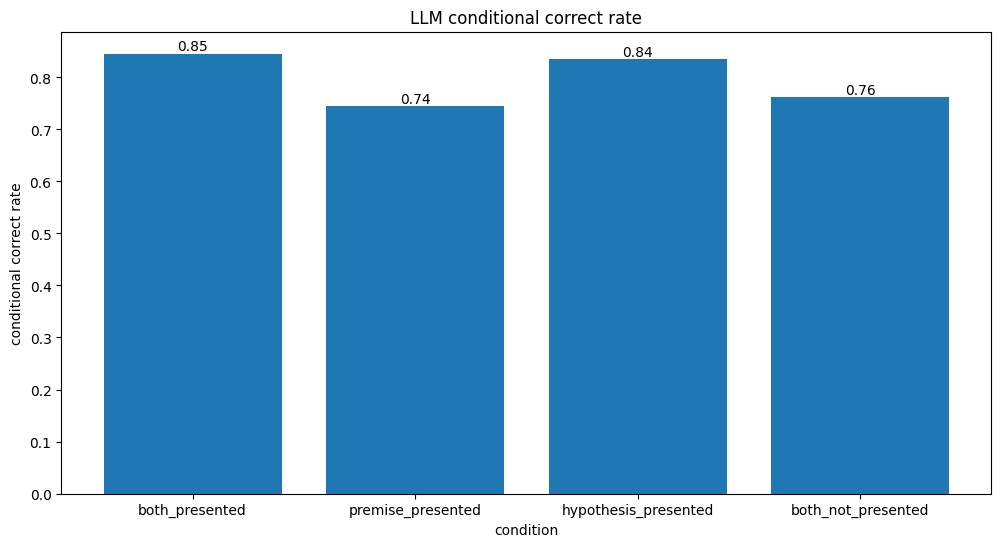

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(
    ['both_presented', 'premise_presented', 'hypothesis_presented', 'both_not_presented'],
    [correct_rate_both_presented, correct_rate_premise_presented, correct_rate_hypothesis_presented, correct_rate_both_not_presented],
    label='correct rate'
    
)
for i, v in enumerate([correct_rate_both_presented, correct_rate_premise_presented, correct_rate_hypothesis_presented, correct_rate_both_not_presented]):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.ylabel('conditional correct rate')
plt.xlabel('condition')
plt.title("LLM conditional correct rate")
plt.show()

In [26]:
print(f"both_presented_joined: {len(both_presented_joined)}, both_presented_and_correct: {len(both_presented_and_correct)}, rate: {correct_rate_both_presented}")
print(f"premise_presented_joined: {len(premise_presented_joined)}, premise_presented_and_correct: {len(premise_presented_and_correct)}, rate: {correct_rate_premise_presented}")
print(f"hypothesis_presented_joined: {len(hypothesis_presented_joined)}, hypothesis_presented_and_correct: {len(hypothesis_presented_and_correct)}, rate: {correct_rate_hypothesis_presented}")
print(f"both_not_presented_joined: {len(both_not_presented_joined)}, both_not_presented_and_correct: {len(both_not_presented_and_correct)}, rate: {correct_rate_both_not_presented}")

both_presented_joined: 434, both_presented_and_correct: 367, rate: 0.8456221198156681
premise_presented_joined: 1686, premise_presented_and_correct: 1256, rate: 0.7449584816132859
hypothesis_presented_joined: 13159, hypothesis_presented_and_correct: 10989, rate: 0.8350938521164222
both_not_presented_joined: 73721, both_not_presented_and_correct: 56222, rate: 0.7626320858371427
